In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#

In [6]:
df = pd.read_csv("/content/Housing.csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [7]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

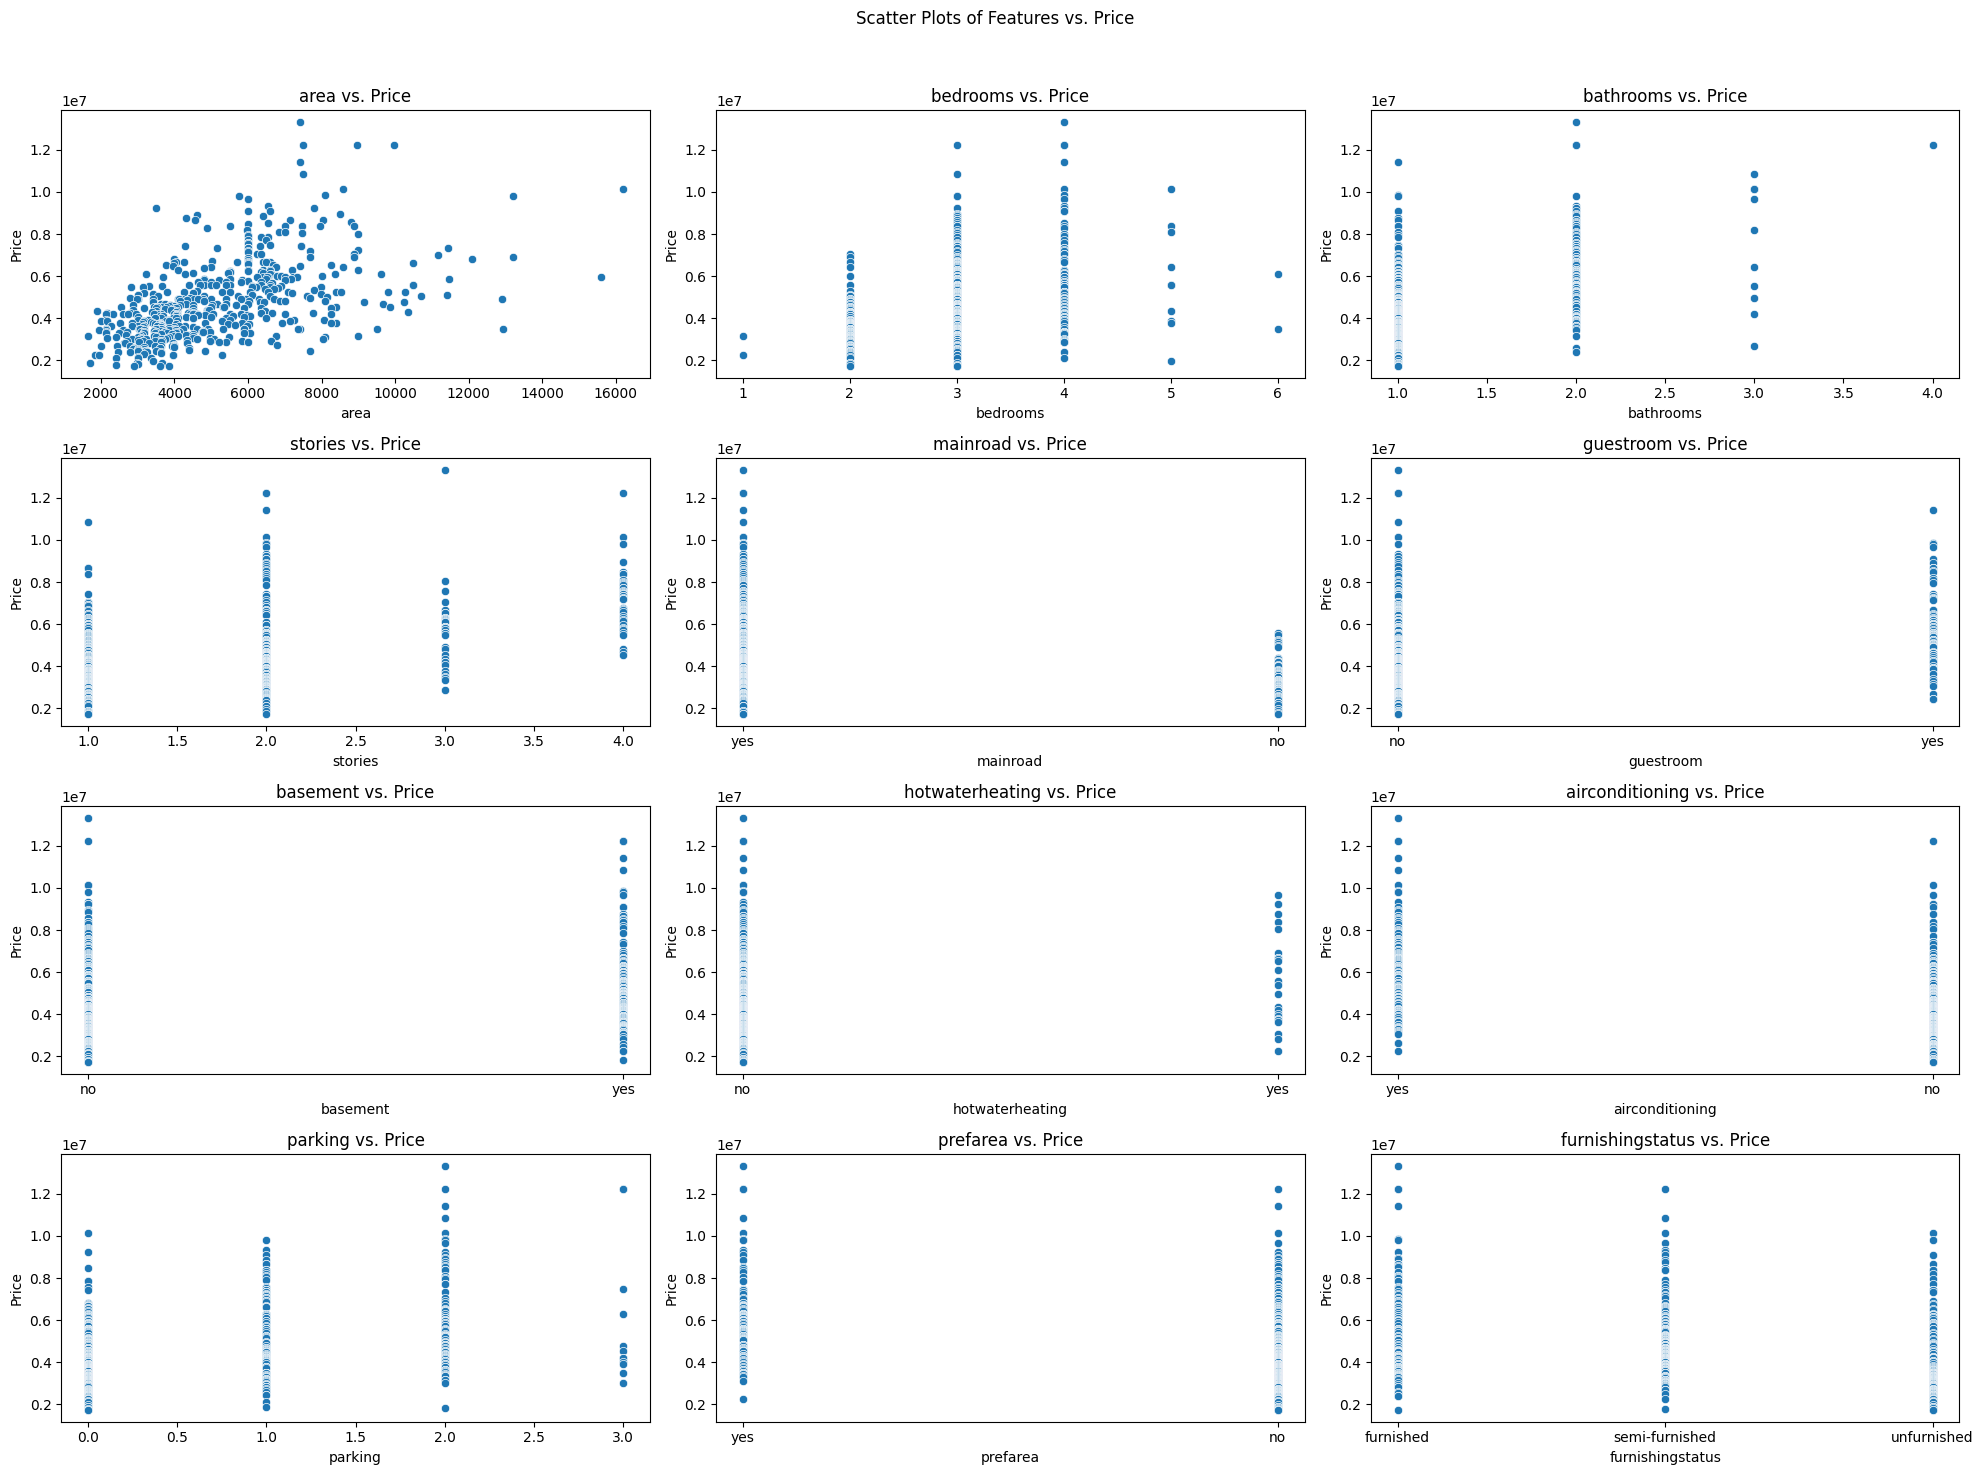

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data into a DataFrame
# df = pd.read_csv('your_data.csv')

# List of features to plot against the target variable 'price'
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
            'basement', 'hotwaterheating', 'airconditioning', 'parking',
            'prefarea', 'furnishingstatus']

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 15))
fig.suptitle('Scatter Plots of Features vs. Price')

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot scatter plots
for i, feature in enumerate(features):
    sns.scatterplot(data=df, x=feature, y='price', ax=axes[i])
    axes[i].set_title(f'{feature} vs. Price')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Price')

# Hide any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust the layout to include the main title
plt.show()


Price is mostly related to Area


In [9]:
columns_to_convert = ['mainroad', 'guestroom','basement','hotwaterheating','airconditioning','prefarea']
df[columns_to_convert] = df[columns_to_convert].replace({'yes': 1, 'no': 0})


/tmp/ipython-input-9-414205536.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[columns_to_convert] = df[columns_to_convert].replace({'yes': 1, 'no': 0})


Positive correlation so we can proceed with manual label encoding

In [10]:

df['prefarea'] = df['prefarea'].replace({'yes': 1, 'no': 0})


In [11]:
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)


In [12]:
df[df.filter(like='furnishingstatus_').columns] = df.filter(like='furnishingstatus_').astype(int)

In [13]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


In [14]:
missing_values = df.isnull().sum()
missing_values

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [15]:
#I want to check coorelation matrix
correlation_matrix = df.corr()
correlation_matrix

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,0.063656,-0.280587
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,0.006156,-0.142278
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,0.050040,-0.126252
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,0.029834,-0.132107
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,-0.003648,-0.082972
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,0.011450,-0.133123
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,0.005821,-0.099023
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,0.050284,-0.117935
hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,0.063819,-0.059194
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,-0.053179,-0.094086


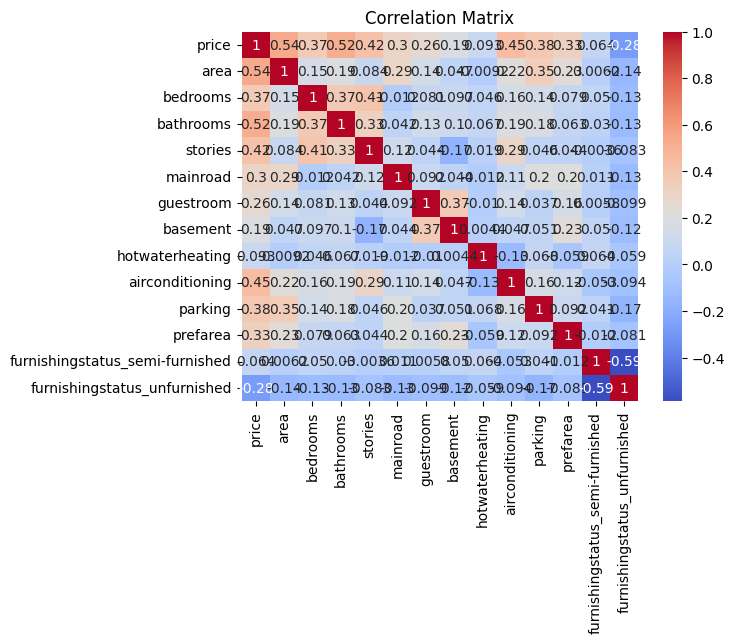

In [16]:
# I want to print correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

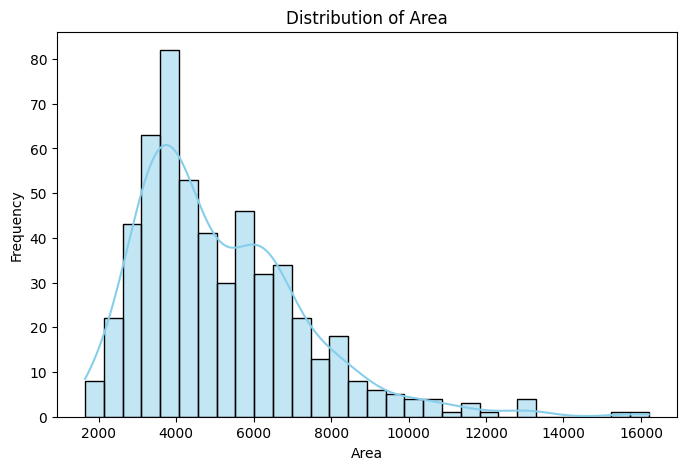

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df['area'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Area')
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.show()


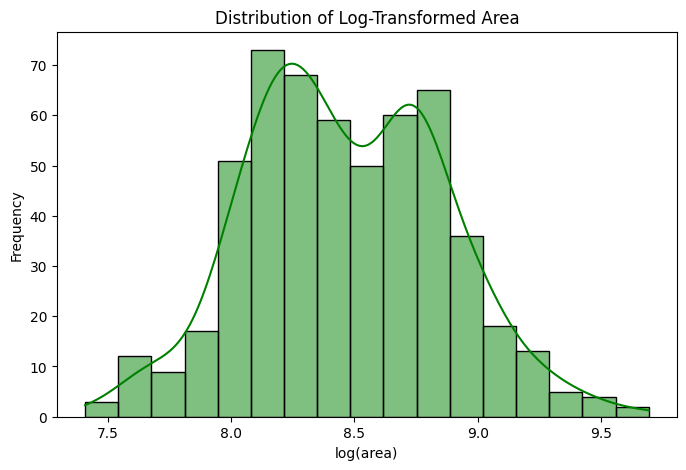

In [18]:
import numpy as np

df['log_area'] = np.log1p(df['area'])



import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(df['log_area'], kde=True, color='green')
plt.title('Distribution of Log-Transformed Area')
plt.xlabel('log(area)')
plt.ylabel('Frequency')
plt.show()

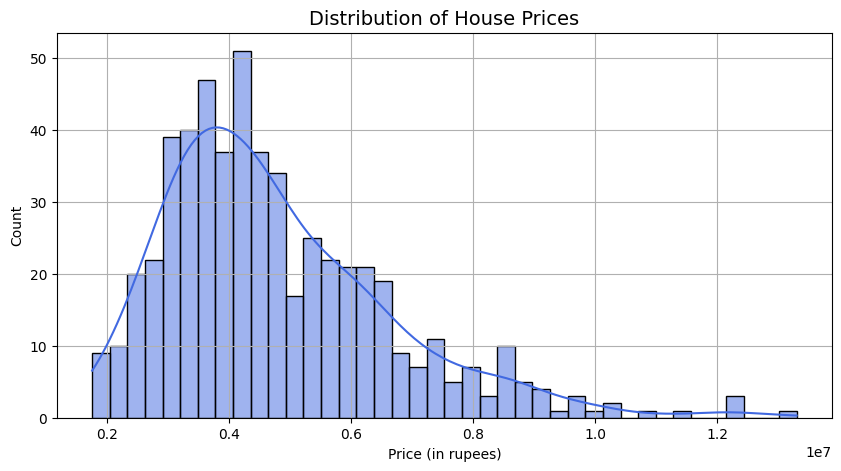

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot original price distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['price'], bins=40, kde=True, color='royalblue')
plt.title('Distribution of House Prices', fontsize=14)
plt.xlabel('Price (in rupees)')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [20]:
df["price_log"] = np.log(df["price"])

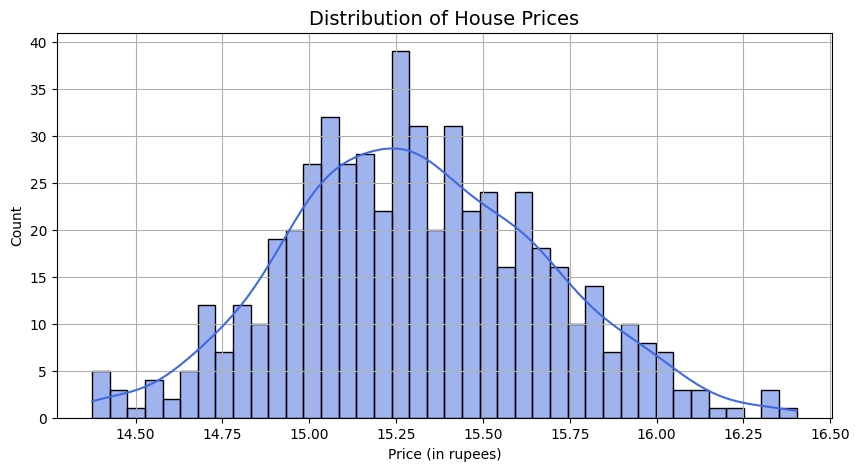

In [21]:
plt.figure(figsize=(10, 5))
sns.histplot(df['price_log'], bins=40, kde=True, color='royalblue')
plt.title('Distribution of House Prices', fontsize=14)
plt.xlabel('Price (in rupees)')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [22]:
df['price_per_sqft'] = df['price'] / df['area'].replace(0, np.nan)

In [23]:
df["area_sq"] = df["area"] ** 2

In [24]:
import numpy as np

# Ratios/density features
df["area_per_bed"] = df["area"] / df["bedrooms"].replace(0, 1)
df["bath_per_bed"] = df["bathrooms"] / df["bedrooms"].replace(0, 1)
df["parking_per_bed"] = df["parking"] / (df["bedrooms"] + 1)

# Amenity count
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
df["amenity_count"] = df[binary_cols].sum(axis=1)

# Interaction terms
df["area_pref"] = df["area"] * df["prefarea"]
df["area_ac"] = df["area"] * df["airconditioning"]



# Log transformations for skewed features


In [25]:
df.shape

(545, 24)

In [26]:
# 6. Define features and target
TARGET = "price_log"
drop_cols = ["price", TARGET]
X = df.drop(columns=drop_cols)
y = df[TARGET]

In [27]:

df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,...,log_area,price_log,price_per_sqft,area_sq,area_per_bed,bath_per_bed,parking_per_bed,amenity_count,area_pref,area_ac
0,13300000,7420,4,2,3,1,0,0,0,1,...,8.912069,16.403275,1792.452830,55056400,1855.000000,0.500000,0.400000,3,7420,7420
1,12250000,8960,4,4,4,1,0,0,0,1,...,9.100637,16.321036,1367.187500,80281600,2240.000000,1.000000,0.600000,2,0,8960
2,12250000,9960,3,2,2,1,0,1,0,0,...,9.206433,16.321036,1229.919679,99201600,3320.000000,0.666667,0.500000,3,9960,0
3,12215000,7500,4,2,2,1,0,1,0,1,...,8.922792,16.318175,1628.666667,56250000,1875.000000,0.500000,0.600000,4,7500,7500
4,11410000,7420,4,1,2,1,1,1,0,1,...,8.912069,16.250001,1537.735849,55056400,1855.000000,0.250000,0.400000,4,0,7420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,...,8.006701,14.414347,606.666667,9000000,1500.000000,0.500000,0.666667,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,...,7.783641,14.384879,736.312500,5760000,800.000000,0.333333,0.000000,0,0,0
542,1750000,3620,2,1,1,1,0,0,0,0,...,8.194506,14.375126,483.425414,13104400,1810.000000,0.500000,0.000000,1,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,...,7.976252,14.375126,601.374570,8468100,970.000000,0.333333,0.000000,0,0,0


In [28]:
X.columns

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished',
       'log_area', 'price_per_sqft', 'area_sq', 'area_per_bed', 'bath_per_bed',
       'parking_per_bed', 'amenity_count', 'area_pref', 'area_ac'],
      dtype='object')

In [29]:
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,...,furnishingstatus_unfurnished,log_area,price_per_sqft,area_sq,area_per_bed,bath_per_bed,parking_per_bed,amenity_count,area_pref,area_ac
0,7420,4,2,3,1,0,0,0,1,2,...,0,8.912069,1792.452830,55056400,1855.000000,0.500000,0.400000,3,7420,7420
1,8960,4,4,4,1,0,0,0,1,3,...,0,9.100637,1367.187500,80281600,2240.000000,1.000000,0.600000,2,0,8960
2,9960,3,2,2,1,0,1,0,0,2,...,0,9.206433,1229.919679,99201600,3320.000000,0.666667,0.500000,3,9960,0
3,7500,4,2,2,1,0,1,0,1,3,...,0,8.922792,1628.666667,56250000,1875.000000,0.500000,0.600000,4,7500,7500
4,7420,4,1,2,1,1,1,0,1,2,...,0,8.912069,1537.735849,55056400,1855.000000,0.250000,0.400000,4,0,7420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,...,1,8.006701,606.666667,9000000,1500.000000,0.500000,0.666667,2,0,0
541,2400,3,1,1,0,0,0,0,0,0,...,0,7.783641,736.312500,5760000,800.000000,0.333333,0.000000,0,0,0
542,3620,2,1,1,1,0,0,0,0,0,...,1,8.194506,483.425414,13104400,1810.000000,0.500000,0.000000,1,0,0
543,2910,3,1,1,0,0,0,0,0,0,...,0,7.976252,601.374570,8468100,970.000000,0.333333,0.000000,0,0,0


In [30]:
y

,price_log
0,16.403275
1,16.321036
2,16.321036
3,16.318175
4,16.250001
...,...
540,14.414347
541,14.384879
542,14.375126
543,14.375126


In [50]:
#all features of x
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,...,furnishingstatus_unfurnished,log_area,price_per_sqft,area_sq,area_per_bed,bath_per_bed,parking_per_bed,amenity_count,area_pref,area_ac
0,7420,4,2,3,1,0,0,0,1,2,...,0,8.912069,1792.452830,55056400,1855.000000,0.500000,0.400000,3,7420,7420
1,8960,4,4,4,1,0,0,0,1,3,...,0,9.100637,1367.187500,80281600,2240.000000,1.000000,0.600000,2,0,8960
2,9960,3,2,2,1,0,1,0,0,2,...,0,9.206433,1229.919679,99201600,3320.000000,0.666667,0.500000,3,9960,0
3,7500,4,2,2,1,0,1,0,1,3,...,0,8.922792,1628.666667,56250000,1875.000000,0.500000,0.600000,4,7500,7500
4,7420,4,1,2,1,1,1,0,1,2,...,0,8.912069,1537.735849,55056400,1855.000000,0.250000,0.400000,4,0,7420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,...,1,8.006701,606.666667,9000000,1500.000000,0.500000,0.666667,2,0,0
541,2400,3,1,1,0,0,0,0,0,0,...,0,7.783641,736.312500,5760000,800.000000,0.333333,0.000000,0,0,0
542,3620,2,1,1,1,0,0,0,0,0,...,1,8.194506,483.425414,13104400,1810.000000,0.500000,0.000000,1,0,0
543,2910,3,1,1,0,0,0,0,0,0,...,0,7.976252,601.374570,8468100,970.000000,0.333333,0.000000,0,0,0


In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [32]:
print("Training Features:\n", X_train)
print("Testing Features:\n", X_test)
print("Training Labels:\n", y_train)
print("Testing Labels:\n", y_test)

Training Features:
      area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
46   6000         3          2        4         1          0         0   
93   7200         3          2        1         1          0         1   
335  3816         2          1        1         1          0         1   
412  2610         3          1        2         1          0         1   
471  3750         3          1        2         1          0         0   
..    ...       ...        ...      ...       ...        ...       ...   
71   6000         4          2        4         1          0         0   
106  5450         4          2        1         1          0         1   
270  4500         3          2        3         1          0         0   
435  4040         2          1        1         1          0         0   
102  5500         3          2        4         1          1         0   

     hotwaterheating  airconditioning  parking  ...  \
46                 0                

In [33]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

In [34]:
X_scaled_train

array([[ 0.38416819,  0.05527092,  1.53917323, ...,  0.01132382,
        -0.50179819,  1.43976659],
       [ 0.9291807 ,  0.05527092,  1.53917323, ...,  0.83418799,
        -0.50179819,  1.85139844],
       [-0.60775457, -1.28351359, -0.5579503 , ...,  0.83418799,
        -0.50179819,  0.69059662],
       ...,
       [-0.29709744,  0.05527092,  1.53917323, ...,  0.01132382,
        -0.50179819, -0.61839268],
       [-0.5060189 , -1.28351359, -0.5579503 , ..., -0.81154035,
        -0.50179819, -0.61839268],
       [ 0.15707965,  0.05527092,  1.53917323, ...,  0.83418799,
        -0.50179819,  1.26825332]])

In [35]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca_train = pca.fit_transform(X_train)
X_pca_test = pca.transform(X_test)

In [36]:
X_pca_train

array([[ 4.58694041e+06,  2.91618247e+03],
       [ 2.04269405e+07,  3.31025660e+03],
       [-1.68512037e+07,  1.82419372e+03],
       [-2.46009598e+07, -5.88869289e+01],
       [-1.73505599e+07, -1.53205114e+03],
       [-6.31295981e+06, -1.95257555e+03],
       [-1.65905599e+07, -1.56942879e+03],
       [-5.64728380e+06, -1.98764314e+03],
       [-2.13006599e+07, -1.38998387e+03],
       [ 4.82734023e+06, -2.40875334e+03],
       [-2.16786599e+07, -1.36632260e+03],
       [ 2.78769403e+07, -3.37751079e+03],
       [ 1.75869403e+07, -2.93617147e+03],
       [-1.86681599e+07, -1.47802529e+03],
       [-2.24130598e+07,  1.30813845e+03],
       [ 1.01894402e+07, -2.62300370e+03],
       [-2.56530599e+07, -1.24649554e+03],
       [-3.32305947e+06,  5.05941452e+03],
       [ 2.37027163e+07, -3.19573969e+03],
       [ 1.14755041e+08, -1.54931652e+03],
       [ 2.12945403e+07, -3.09282490e+03],
       [-2.24130599e+07, -1.33777483e+03],
       [-4.37305965e+06,  2.56745611e+03],
       [ 3.

In [37]:
X_train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,...,furnishingstatus_unfurnished,log_area,price_per_sqft,area_sq,area_per_bed,bath_per_bed,parking_per_bed,amenity_count,area_pref,area_ac
46,6000,3,2,4,1,0,0,0,1,1,...,0,8.699681,1254.166667,36000000,2000.000000,0.666667,0.250000,2,0,6000
93,7200,3,2,1,1,0,1,0,1,3,...,0,8.881975,875.000000,51840000,2400.000000,0.666667,0.750000,3,0,7200
335,3816,2,1,1,1,0,1,0,1,2,...,0,8.247220,1027.253669,14561856,1908.000000,0.500000,0.666667,3,0,3816
412,2610,3,1,2,1,0,1,0,0,0,...,1,7.867489,1314.176245,6812100,870.000000,0.333333,0.000000,3,2610,0
471,3750,3,1,2,1,0,0,0,0,0,...,1,8.229778,802.666667,14062500,1250.000000,0.333333,0.000000,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,6000,4,2,4,1,0,0,0,1,0,...,1,8.699681,1125.833333,36000000,1500.000000,0.500000,0.000000,2,0,6000
106,5450,4,2,1,1,0,1,0,1,0,...,0,8.603554,1130.275229,29702500,1362.500000,0.500000,0.000000,4,5450,5450
270,4500,3,2,3,1,0,0,1,0,1,...,0,8.412055,964.444444,20250000,1500.000000,0.666667,0.250000,2,0,0
435,4040,2,1,1,1,0,0,0,0,0,...,1,8.304247,814.356436,16321600,2020.000000,0.500000,0.000000,1,0,0


In [38]:
y_train

,price_log
46,15.833741
93,15.656060
335,15.181602
412,15.048071
471,14.917451
...,...
71,15.725794
106,15.633587
270,15.283385
435,15.006398


In [39]:
X_test

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,...,furnishingstatus_unfurnished,log_area,price_per_sqft,area_sq,area_per_bed,bath_per_bed,parking_per_bed,amenity_count,area_pref,area_ac
316,5900,4,2,2,0,0,1,0,0,1,...,1,8.682877,688.135593,34810000,1475.000000,0.500000,0.20,1,0,0
77,6500,3,2,3,1,0,0,0,1,0,...,0,8.779711,1023.076923,42250000,2166.666667,0.666667,0.00,3,6500,6500
360,4040,2,1,1,1,0,0,0,0,0,...,0,8.304247,918.316832,16321600,2020.000000,0.500000,0.00,1,0,0
90,5000,3,1,2,1,0,0,0,1,0,...,0,8.517393,1288.000000,25000000,1666.666667,0.333333,0.00,2,0,5000
493,3960,3,1,1,1,0,0,0,0,0,...,0,8.284252,707.070707,15681600,1320.000000,0.333333,0.00,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,6000,4,1,2,1,0,1,0,0,2,...,0,8.699681,1516.666667,36000000,1500.000000,0.250000,0.40,2,0,0
357,6930,4,1,2,0,0,0,0,0,1,...,0,8.843759,544.444444,48024900,1732.500000,0.250000,0.20,0,0,0
39,6000,4,2,4,1,0,0,0,1,1,...,0,8.699681,1318.333333,36000000,1500.000000,0.500000,0.20,2,0,6000
54,6000,3,2,2,1,1,0,0,1,1,...,0,8.699681,1225.000000,36000000,2000.000000,0.666667,0.25,3,0,6000


In [40]:
y_test

,price_log
316,15.216694
77,15.710127
360,15.126542
90,15.678039
493,14.845130
...,...
15,16.023785
357,15.143381
39,15.883638
54,15.810211


In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
lreg = LinearRegression()
lreg.fit(X_scaled_train, y_train)

LinearRegression()

In [42]:
lreg.score( X_scaled_test, y_test)

0.9685236089098711

In [43]:
# Ridge regression
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
ridge = Ridge(alpha=1)  # You can tune this alpha
ridge.fit(X_scaled_train, y_train)

# Predict and convert back from log scale
y_pred = ridge.predict(X_scaled_test)

# Evaluate
y_true = y_test
print("Ridge R²:", r2_score(y_true, y_pred))
print("Ridge MSE:", mean_squared_error(y_true, y_pred))


NameError: name 'r2_score' is not defined

In [ ]:
ridge.score(X_scaled_test, y_test)

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Initialize and train the ElasticNet regression model
elasticnet_model = ElasticNet(alpha=0.01, l1_ratio=0.1)  # Set alpha and l1_ratio parameters
elasticnet_model.fit(X_scaled_train, y_train)

# Make predictions on the test set for ElasticNet model
y_pred_elasticnet = elasticnet_model.predict(X_scaled_test)

# Calculate evaluation metrics for ElasticNet model
mae_elasticnet = mean_absolute_error(y_test, y_pred_elasticnet)
mse_elasticnet = mean_squared_error(y_test, y_pred_elasticnet)
rmse_elasticnet = np.sqrt(mse_elasticnet)
r2_elasticnet = r2_score(y_test, y_pred_elasticnet)

print("ElasticNet Regression:")
print(f"Mean Absolute Error (MAE): {mae_elasticnet}")
print(f"Mean Squared Error (MSE): {mse_elasticnet}")
print(f"Root Mean Squared Error (RMSE): {rmse_elasticnet}")
print(f"R-squared (R²): {r2_elasticnet}")

In [ ]:
lreg_pca = LinearRegression()
lreg_pca.fit(X_pca_train,y_train)

In [ ]:
lreg_pca.score(X_pca_test,y_test)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
lreg = LinearRegression()
lreg.fit(X_pca_train, y_train)

In [ ]:
lreg.score(X_pca_test,y_test)

### SVR

In [44]:
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
X

In [ ]:
X = df.drop(columns=(["price_log","price"]))
y = df["price_log"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
y

In [ ]:
X_train

In [45]:
svr_pipeline = Pipeline([
    ("scaler", StandardScaler()),      # Feature scaling is mandatory
    ("svr", SVR(kernel="rbf", C=100, epsilon=0.1))  # You can tune C and epsilon
])

In [ ]:
svr_pipeline.fit(X_train, y_train)

In [ ]:
y_pred = svr_pipeline.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))


In [46]:
# Grid searchCV
from sklearn.model_selection import GridSearchCV
param_grid = {
    'svr__C': [0.1, 1, 10, 100],
    'svr__epsilon': [0.01, 0.1, 1]
}
grid_search = GridSearchCV(svr_pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svr', SVR(C=100))]),
             param_grid={'svr__C': [0.1, 1, 10, 100],
                         'svr__epsilon': [0.01, 0.1, 1]})

In [47]:
grid_search.best_params_

{'svr__C': 10, 'svr__epsilon': 0.01}

In [48]:
#check accuracy
y_pred = grid_search.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))


R² Score: 0.9512070898834908


In [ ]:
import pickle

# Save SVR model
with open("svr_model.pkl", "wb") as f:
    pickle.dump(grid_search, f)

# Save Linear Regression model
with open("linear_model.pkl", "wb") as f:
    pickle.dump(ridge, f)


____________________________________________________________________________________________________

In [ ]:
# want to copy df into df2
df2 = df.copy()

In [ ]:
columns_to_convert = ['mainroad', 'guestroom','basement','hotwaterheating','airconditioning','prefarea']
df2[columns_to_convert] = df2[columns_to_convert].replace({'yes': 1, 'no': 0})
df2['prefarea'] = df2['prefarea'].replace({'yes': 1, 'no': 0})
df2['furnishingstatus'] = df2['furnishingstatus'].replace({'furnished': 3, 'semi-furnished': 2, 'unfurnished': 1})

In [ ]:
df2

In [ ]:
# I want to find correlation of features with area
correlation_matrix = df2.corr()
correlation_matrix['area']



**Keep these features only, drop weakly correlated ones:**

In [ ]:
df2 = df2.drop(columns=['guestroom', 'basement', 'hotwaterheating'])

In [ ]:
df2['area_parking'] = df2['area'] * df2['parking']
df2['area_ac'] = df2['area'] * df2['airconditioning']
df2['area_pref'] = df2['area'] * df2['prefarea']
df2['area_mainroad'] = df2['area'] * df2['mainroad']

In [ ]:
df2

In [ ]:
df2.corr()

In [ ]:
Q1 = df2['area'].quantile(0.25)
Q3 = df2['area'].quantile(0.75)
IQR = Q3 - Q1
df2['area_outlier'] = ~df2['area'].between(Q1 - 1.5 * IQR, Q3 + 1.5 * IQR)
print(df2[df2['area_outlier']])
df2 = df2[~df2['area_outlier']]
df2.drop('area_outlier', axis=1, inplace=True)

In [ ]:
#Want to print price to check variation
#  scatter plot for price
plt.scatter(df2['price'], df2['area'])
plt.xlabel('Price')
plt.ylabel('Area')
plt.title('Scatter Plot of Price vs. Area')
plt.show()




In [ ]:
# plot logprice
plt.scatter(df2['area'], np.log(df2['price']))
plt.xlabel('area')
plt.ylabel('Log(price)')
plt.title('Scatter Plot of Price vs. Log(Area)')
plt.show()

In [ ]:
#plot correlation matrix
sns.heatmap(df2.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# convert price into log(price)


In [ ]:
from sklearn.model_selection import train_test_split
X2 = df2.drop('price', axis=1)
y2= df2['price']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2,random_state=42)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled_train2 = scaler.fit_transform(X_train2)
X_scaled_test2 = scaler.transform(X_test2)

In [ ]:
# remove these the raws with true in area_outlier


In [ ]:
y_train2

In [ ]:
X_scaled_train2


In [ ]:
y2

In [ ]:
# apply again corr matrix
sns.heatmap(df2.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Now want to apply linear regression to predict the log price
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
reg = LinearRegression()
reg.fit(X_scaled_train2, y_train2)

In [ ]:
reg.score(X_scaled_test2,y_test2)

In [ ]:
#Want to analyse whole accuray matrix for linear regression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred = reg.predict(X_scaled_test2)
mae = mean_absolute_error(y_test2, y_pred)
mse = mean_squared_error(y_test2, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test2, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")


In [ ]:
# Want to apply regularization liss and reggo
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
ridge = Ridge(alpha=1)  # You can tune this alpha
ridge.fit(X_scaled_train2, y_train2)

# Predict and convert back from log scale
y_pred = ridge.predict(X_scaled_test2)

# Evaluate
y_true = y_test2
print("Ridge R²:", r2_score(y_true, y_pred))
print("Ridge MSE:", mean_squared_error(y_true, y_pred))

In [ ]:
# want to apply regularization
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet



In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load your dataset
# Assuming your data is in a DataFrame `df` with target column 'target'
# df = pd.read_csv('your_dataset.csv')

# For demonstration purposes, let's create a sample dataset


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")




In [ ]:
from sklearn.linear_model import Lasso, Ridge

# Initialize and train the Lasso regression model (L1 regularization)
lasso_model = Lasso(alpha=10)  # Set the regularization strength (alpha)
lasso_model.fit(X_train, y_train)

# Initialize and train the Ridge regression model (L2 regularization)
ridge_model = Ridge(alpha=0.01)  # Set the regularization strength (alpha)
ridge_model.fit(X_train, y_train)

# Make predictions on the test set for Lasso model
y_pred_lasso = lasso_model.predict(X_test)

# Make predictions on the test set for Ridge model
y_pred_ridge = ridge_model.predict(X_test)

# Calculate evaluation metrics for Lasso model
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Calculate evaluation metrics for Ridge model
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Lasso Regression:")
print(f"Mean Absolute Error (MAE): {mae_lasso}")
print(f"Mean Squared Error (MSE): {mse_lasso}")
print(f"Root Mean Squared Error (RMSE): {rmse_lasso}")
print(f"R-squared (R²): {r2_lasso}")
print("\nRidge Regression:")
print(f"Mean Absolute Error (MAE): {mae_ridge}")
print(f"Mean Squared Error (MSE): {mse_ridge}")
print(f"Root Mean Squared Error (RMSE): {rmse_ridge}")
print(f"R-squared (R²): {r2_ridge}")


In [ ]:
lasso_model.score(X_test, y_test)

In [ ]:
ridge_model.score(X_test, y_test)

In [ ]:
from sklearn.linear_model import ElasticNet

# Initialize and train the ElasticNet regression model
elasticnet_model = ElasticNet(alpha=0.01, l1_ratio=0.1)  # Set alpha and l1_ratio parameters
elasticnet_model.fit(X_train, y_train)

# Make predictions on the test set for ElasticNet model
y_pred_elasticnet = elasticnet_model.predict(X_test)

# Calculate evaluation metrics for ElasticNet model
mae_elasticnet = mean_absolute_error(y_test, y_pred_elasticnet)
mse_elasticnet = mean_squared_error(y_test, y_pred_elasticnet)
rmse_elasticnet = np.sqrt(mse_elasticnet)
r2_elasticnet = r2_score(y_test, y_pred_elasticnet)

print("ElasticNet Regression:")
print(f"Mean Absolute Error (MAE): {mae_elasticnet}")
print(f"Mean Squared Error (MSE): {mse_elasticnet}")
print(f"Root Mean Squared Error (RMSE): {rmse_elasticnet}")
print(f"R-squared (R²): {r2_elasticnet}")


In [ ]:
elasticnet_model.score(X_test, y_test)

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV


In [ ]:
svm_classifier = SVC(kernel='linear', C=20, gamma=42, random_state=100)

svm_classifier.fit(X_train_scaled, y_train)

y_pred = svm_classifier.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(penalty='l1', dual=False, max_iter=10000))
])
param_grid_l1 = {
    'linear_svc__C': [10,100,200]
}

clf_l1 = GridSearchCV(pipeline, param_grid_l1, cv=5, return_train_score=False)

clf_l1.fit(X_train, y_train)

In [ ]:
y_pred = clf_l1.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

In [ ]:
r2

In [ ]:
from sklearn.linear_model import ElasticNet
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=0)
elastic_net.fit(X_train_scaled, y_train)
elastic_net.score(X_test_scaled, y_test)

In [ ]:
y_pred = elastic_net.predict(X_test_scaled)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

In [ ]:
reg.score(X_test, y_test)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
reg.fit(X_train_scaled, y_train)
y_pred = reg.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
reg.score(X_test_scaled, y_test)

In [ ]:
svm.score(X_scaled_test,y_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(X_train, y_train)


In [ ]:

from sklearn.ensemble import RandomForestClassifier
forest2=RandomForestClassifier(n_estimators=10, criterion='gini',
max_depth=None,min_samples_split=2, min_samples_leaf=1,
min_weight_fraction_leaf=0.0, max_features='auto',
max_leaf_nodes=None,bootstrap=True, oob_score=False, n_jobs=1,
random_state=None, verbose=0, warm_start=False,class_weight=None)
forest2.fit(X_train, y_train)
forest2.score(X_test, y_test)

In [ ]:
forest.score(X_test, y_test)
#

In [ ]:
from sklearn.model_selection import GridSearchCV
forest2 = RandomForestRegressor()
param_grid = {
    'n_estimators': [5, 100, 200],
    'max_depth': [10, 15, 20]}

grid_search = GridSearchCV(forest2, param_grid, cv=5)
grid_search.fit(X_train, y_train)


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

n_train_0 = (y_train ==
n_train_1 = (y_train == 1).sum()

# Count the number of samples for each class in the testing set
n_test_0 = (y_test == 0).sum()
n_test_1 = (y_test == 1).sum()

# Calculate the total number of samples in the training and testing sets
n_train = len(y_train)
n_test = len(y_test)

# Calculate the probabilities of predicting class 1 for the training and testing sets
y_proba_train = np.ones(n_train)
y_proba_test = np.ones(n_test)

# Predict class labels based on the probabilities (threshold of 0.5)
y_pred_train = y_proba_train > 0.5
y_pred_test = y_proba_test > 0.5

# Print accuracy scores and confusion matrices for training and testing sets
print("Training Set:")
print(f"Accuracy Score: {accuracy_score(y_train, y_pred_train)}")
cf_mat_train = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix:")
print(cf_mat_train)
print(f"Class 0 Accuracy: {cf_mat_train[0][0] / n_train_0}")
print(f"Class 1 Accuracy: {cf_mat_train[1][1] / n_train_1}")

print("\nTesting Set:")
print(f"Accuracy Score: {accuracy_score(y_test, y_pred_test)}")
cf_mat_test = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:")
print(cf_mat_test)
print(f"Class 0 Accuracy: {cf_mat_test[0][0] / n_test_0}")
print(f"Class 1 Accuracy: {cf_mat_test[1][1] / n_test_1}")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define labels for the bar plot
labels = ['Accuracy', 'Class 0 Accuracy', 'Class 1 Accuracy']

# Define values for training and testing sets
train_values = [accuracy_score(y_train, y_pred_train),
                cf_mat_train[0][0] / n_train_0,
                cf_mat_train[1][1] / n_train_1]

test_values = [accuracy_score(y_test, y_pred_test),
               cf_mat_test[0][0] / n_test_0,
               cf_mat_test[1][1] / n_test_1]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

# Plotting the bars for training and testing sets
fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, train_values, width, label='Training Set')
rects2 = ax.bar(x + width/2, test_values, width, label='Testing Set')

# Adding some text for labels, title, and custom x-axis tick labels
ax.set_ylabel('Scores')
ax.set_title('Accuracy Scores and Class-wise Accuracy')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Adding the text values on top of the bars
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


In [ ]:
best_forest =grid_search.best_estimator_
best_forest.score(X_test, y_test)

In [ ]:
train_data = X_train.join(y_train)
train_data

In [ ]:
test_data = X_test.join(y_test)
test_data

In [ ]:
line_space = np.linspace(10, 100, 10)
line_space

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

svm2 = SVC(kernel='rbf', C=30, gamma='auto')
svm2.fit(X_train, y_train)
score = svm2.score(X_test, y_test)
print(f"Test Score: {score}")

y_pred = svm2.predict(X_test)
print(classification_report(y_test, y_pred))


In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy'
                             , max_depth = 3
                             , random_state = 0)
tree.fit(X_train,y_train)

In [ ]:
tree.score(X_test, y_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5
                          , p=2
                          , metric = 'minkowski')


knn.fit(X_train,y_train)

In [ ]:
knn.score(X_test, y_test)

In [ ]:
model = LogisticRegression(max_iter=200)

# Train the model
model.fit(X_train, y_train)

In [ ]:
model.score(X_test, y_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# logistic regression
model1 = LogisticRegression()
# knn
model2 = KNeighborsClassifier(n_neighbors=4)

# fit model
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)

In [ ]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.datasets import make_classification

# Generate a sample dataset


# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train two SVC models with different kernels using OneVsRestClassifier
model1 = OneVsRestClassifier(SVC(probability=True, kernel='linear', random_state=42))
model2 = OneVsRestClassifier(SVC(probability=True, kernel='rbf', random_state=42))

model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

# Predict probabilities
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)

# Calculate AUC scores for multiclass classification using 'ovr' (one-vs-rest) strategy
auc_score1 = roc_auc_score(y_test, pred_prob1, multi_class='ovr')
auc_score2 = roc_auc_score(y_test, pred_prob2, multi_class='ovr')

print("AUC Score for model1:", auc_score1)
print("AUC Score for model2:", auc_score2)

# Plot ROC curve for one-vs-rest for each class
fpr1, tpr1, _ = roc_curve(y_test.ravel(), pred_prob1.ravel())
fpr2, tpr2, _ = roc_curve(y_test.ravel(), pred_prob2.ravel())

roc_auc1 = auc(fpr1, tpr1)
roc_auc2 = auc(fpr2, tpr2)

plt.figure()
plt.plot(fpr1, tpr1, color='darkorange', lw=2, label='ROC curve model1 (area = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, color='blue', lw=2, label='ROC curve model2 (area = %0.2f)' % roc_auc2)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.metrics import roc_auc_score

# auc scores
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)

# Calculate AUC scores for multiclass classification using 'ovr' (one-vs-rest) strategy
auc_score1 = roc_auc_score(y_test, pred_prob1, multi_class='ovr')
auc_score2 = roc_auc_score(y_test, pred_prob2, multi_class='ovr')

print("AUC Score for model1:", auc_score1)
print("AUC Score for model2:", auc_score2)

# Plot ROC curve for one-vs-rest
fpr1, tpr1, _ = roc_curve(y_test, pred_prob1[:, 1], pos_label=1)
fpr2, tpr2, _ = roc_curve(y_test, pred_prob2[:, 1], pos_label=1)

roc_auc1 = auc(fpr1, tpr1)
roc_auc2 = auc(fpr2, tpr2)

plt.figure()
plt.plot(fpr1, tpr1, color='darkorange', lw=2, label='ROC curve model1 (area = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, color='blue', lw=2, label='ROC curve model2 (area = %0.2f)' % roc_auc2)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
pip install flask

In [ ]:
import pickle
with open('svm_model.pkl', 'wb') as file:
    pickle.dump(svm, file, protocol=4)

In [ ]:
with open('svm_model.pkl', 'rb') as file:
    rf_model_loaded = pickle.load(file)

In [ ]:
score = rf_model_loaded.score(X_test,y_test)
score

In [ ]:
df.info()

In [ ]:
df.columns